In [1]:
import numpy as np
import pandas as pd 
import re

In [2]:
df1 = pd.read_csv('/content/CHAOBA.csv')
df2 = pd.read_csv('/content/Havells_HD3151.csv')
df3 = pd.read_csv('/content/Nova_NHP_8100.csv')
df4 = pd.read_csv('/content/Philips_HP8100.csv')

In [3]:
df1['product'] = 'Chaoba'
df2['product'] = 'Havells_HD3151'
df3['product'] = 'Nova_NHP_8100'
df4['product'] = 'Philips_HP8100'


In [4]:
df1.head()

,Unnamed: 0,date_info,name,title,content,rating,product
0,0,Reviewed in India on 19 September 2019,Abhinav Upadhyay,Very Dangerous. Burnt in Flames in first use.,So here's my survival story: received the prod...,1.0 out of 5 stars,Chaoba
1,1,Reviewed in India on 11 October 2018,Sharada Jadhav,Worst product,"Its been just two months,, i have used 3 to 4 ...",1.0 out of 5 stars,Chaoba
2,2,Reviewed in India on 3 January 2019,ANN,No Chinese writing in product.,Product working good. Heat protection is activ...,3.0 out of 5 stars,Chaoba
3,3,Reviewed in India on 28 November 2018,Navkomal,Good Quality and speed.,"""Hair style with safety - This is what I was l...",5.0 out of 5 stars,Chaoba
4,4,Reviewed in India on 23 August 2018,rupali,Motor coil burned in 3rd use,The motor of the drier gave up in just 3rd use...,1.0 out of 5 stars,Chaoba


In [5]:
df = pd.concat([df1, df2, df3, df4], axis=0, ignore_index=True)
df.head()

,Unnamed: 0,date_info,name,title,content,rating,product
0,0,Reviewed in India on 19 September 2019,Abhinav Upadhyay,Very Dangerous. Burnt in Flames in first use.,So here's my survival story: received the prod...,1.0 out of 5 stars,Chaoba
1,1,Reviewed in India on 11 October 2018,Sharada Jadhav,Worst product,"Its been just two months,, i have used 3 to 4 ...",1.0 out of 5 stars,Chaoba
2,2,Reviewed in India on 3 January 2019,ANN,No Chinese writing in product.,Product working good. Heat protection is activ...,3.0 out of 5 stars,Chaoba
3,3,Reviewed in India on 28 November 2018,Navkomal,Good Quality and speed.,"""Hair style with safety - This is what I was l...",5.0 out of 5 stars,Chaoba
4,4,Reviewed in India on 23 August 2018,rupali,Motor coil burned in 3rd use,The motor of the drier gave up in just 3rd use...,1.0 out of 5 stars,Chaoba


In [6]:
df.columns

Index(['Unnamed: 0', 'date_info', 'name', 'title', 'content', 'rating',
       'product'],
      dtype='object')

In [7]:
df = df.drop(['Unnamed: 0', 'name', 'title', 'rating'], axis=1)

In [8]:
df.head()

,date_info,content,product
0,Reviewed in India on 19 September 2019,So here's my survival story: received the prod...,Chaoba
1,Reviewed in India on 11 October 2018,"Its been just two months,, i have used 3 to 4 ...",Chaoba
2,Reviewed in India on 3 January 2019,Product working good. Heat protection is activ...,Chaoba
3,Reviewed in India on 28 November 2018,"""Hair style with safety - This is what I was l...",Chaoba
4,Reviewed in India on 23 August 2018,The motor of the drier gave up in just 3rd use...,Chaoba


In [9]:
df['year'] = df["date_info"].str[-4:].astype(int)

In [10]:
df.head()

,date_info,content,product,year
0,Reviewed in India on 19 September 2019,So here's my survival story: received the prod...,Chaoba,2019
1,Reviewed in India on 11 October 2018,"Its been just two months,, i have used 3 to 4 ...",Chaoba,2018
2,Reviewed in India on 3 January 2019,Product working good. Heat protection is activ...,Chaoba,2019
3,Reviewed in India on 28 November 2018,"""Hair style with safety - This is what I was l...",Chaoba,2018
4,Reviewed in India on 23 August 2018,The motor of the drier gave up in just 3rd use...,Chaoba,2018


In [11]:
df = df.drop(columns=['date_info'])

In [12]:
df.head()

,content,product,year
0,So here's my survival story: received the prod...,Chaoba,2019
1,"Its been just two months,, i have used 3 to 4 ...",Chaoba,2018
2,Product working good. Heat protection is activ...,Chaoba,2019
3,"""Hair style with safety - This is what I was l...",Chaoba,2018
4,The motor of the drier gave up in just 3rd use...,Chaoba,2018


In [13]:
df.to_excel('dataset.xlsx')

In [ ]:
df = df[['year', 'content']]

In [ ]:
df.head()

,year,content
0,2019,So here's my survival story: received the prod...
1,2018,"Its been just two months,, i have used 3 to 4 ..."
2,2019,Product working good. Heat protection is activ...
3,2018,"""Hair style with safety - This is what I was l..."
4,2018,The motor of the drier gave up in just 3rd use...


In [ ]:
df['year'].value_counts()

2019    6459
2020    5605
2018    2502
2021    2477
2017     864
2016     336
2015      23
2014       2
Name: year, dtype: int64

In [ ]:
for e in range(2018,2022):
  fname = 'df_' + str(e) + '.csv'
  df_temp = df[df['year'] == e ]
  print(str(e), '---> ', df_temp.shape[0])
  df_temp.to_csv(fname)

2018 --->  2502
2019 --->  6459
2020 --->  5605
2021 --->  2477


In [ ]:
import nltk
import re 

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.corpus import stopwords, sentiwordnet
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

In [ ]:
df['word_count'] = df['content'].apply(lambda x: len(str(x).split(" ")))
ds_count = len(df.word_count)

In [ ]:
# Create a list of stop words from nltk
stop_words = set(stopwords.words("english"))
print(sorted(stop_words))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some',

In [ ]:
corpus = []
for i in range(0, ds_count):
  # remove punctuation
  text = re.sub('[^a-zA-Z]', ' ', str(df['content'][i]))

  # convert to lowercase
  text = text.lower()

  # Remove tags
  text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
  
  # Remove special characters and digits
  text=re.sub("(\\d|\\W)+"," ",text)
  
  # Convert to list from string
  text = text.split()
  
  # Stemming
  ps=PorterStemmer()
  
  # Lemmatisation
  lem = WordNetLemmatizer()
  text = [lem.lemmatize(word) for word in text if not word in  
          stop_words] 
  text = " ".join(text)
  corpus.append(text)

NameError: ignored

In [ ]:
corpus[:5]
file_prefix = 'f'

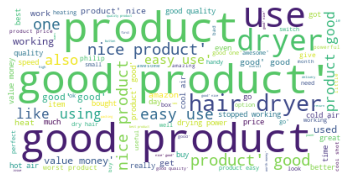

In [ ]:
# Generate word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig(file_prefix + "wordcloud.png", dpi=900)

In [ ]:
# Tokenize the text and build a vocabulary of known words
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [ ]:
# Sample the returned vector encoding the length of the entire vocabulary
list(cv.vocabulary_.keys())[:10]

['story',
 'received',
 'product',
 'without',
 'protection',
 'soon',
 'plugged',
 'socket',
 'turned',
 'electricity']

    Keyword  Frequency
0   product       8323
1      good       6939
2      nice       2376
3       use       2065
4     dryer       1618
5   working       1564
6      hair       1529
7   quality       1373
8     price       1277
9      easy       1218
10      air       1206
11      one       1098
12    money       1087
13      buy        887
14     best        885
15     like        801
16      hot        770
17     work        735
18    month        710
19     cool        664


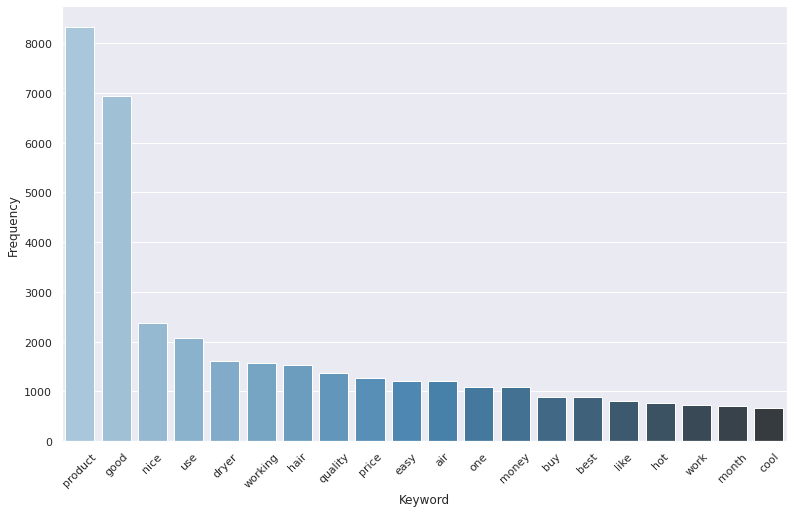

In [ ]:
# View most frequently occuring keywords
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

# Convert most freq words to dataframe for plotting bar plot, save as CSV
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Keyword", "Frequency"]
print(top_df)
top_df.to_csv(file_prefix + '_top_words.csv')

# Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Keyword", y="Frequency", data=top_df, palette="Blues_d")
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.figure.savefig(file_prefix + "_keyword.png", bbox_inches = "tight")

In [ ]:
corpus[:5]

NameError: ignored